# SECTION 1: DECLARE THE MODULES

In [29]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




# SECTION 2: Data import and preprocess
#Run this but dont worry if it does not make any sense Jump to SECTION 3 that is related to your HD task.

In [30]:
!pip install wget
import wget

link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data)

In [44]:
from google.colab import files

uploaded= files.upload()

Saving KDDTest+.txt to KDDTest+ (1).txt
Saving KDDTrain+.txt to KDDTrain+ (1).txt
Saving training_attack_types.txt to training_attack_types (3).txt


In [46]:
DataSet

'training_attack_types (2).txt'

In [47]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names
# file, but it is supposed to be a binary feature according to the
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [48]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [49]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [50]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)






In [51]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

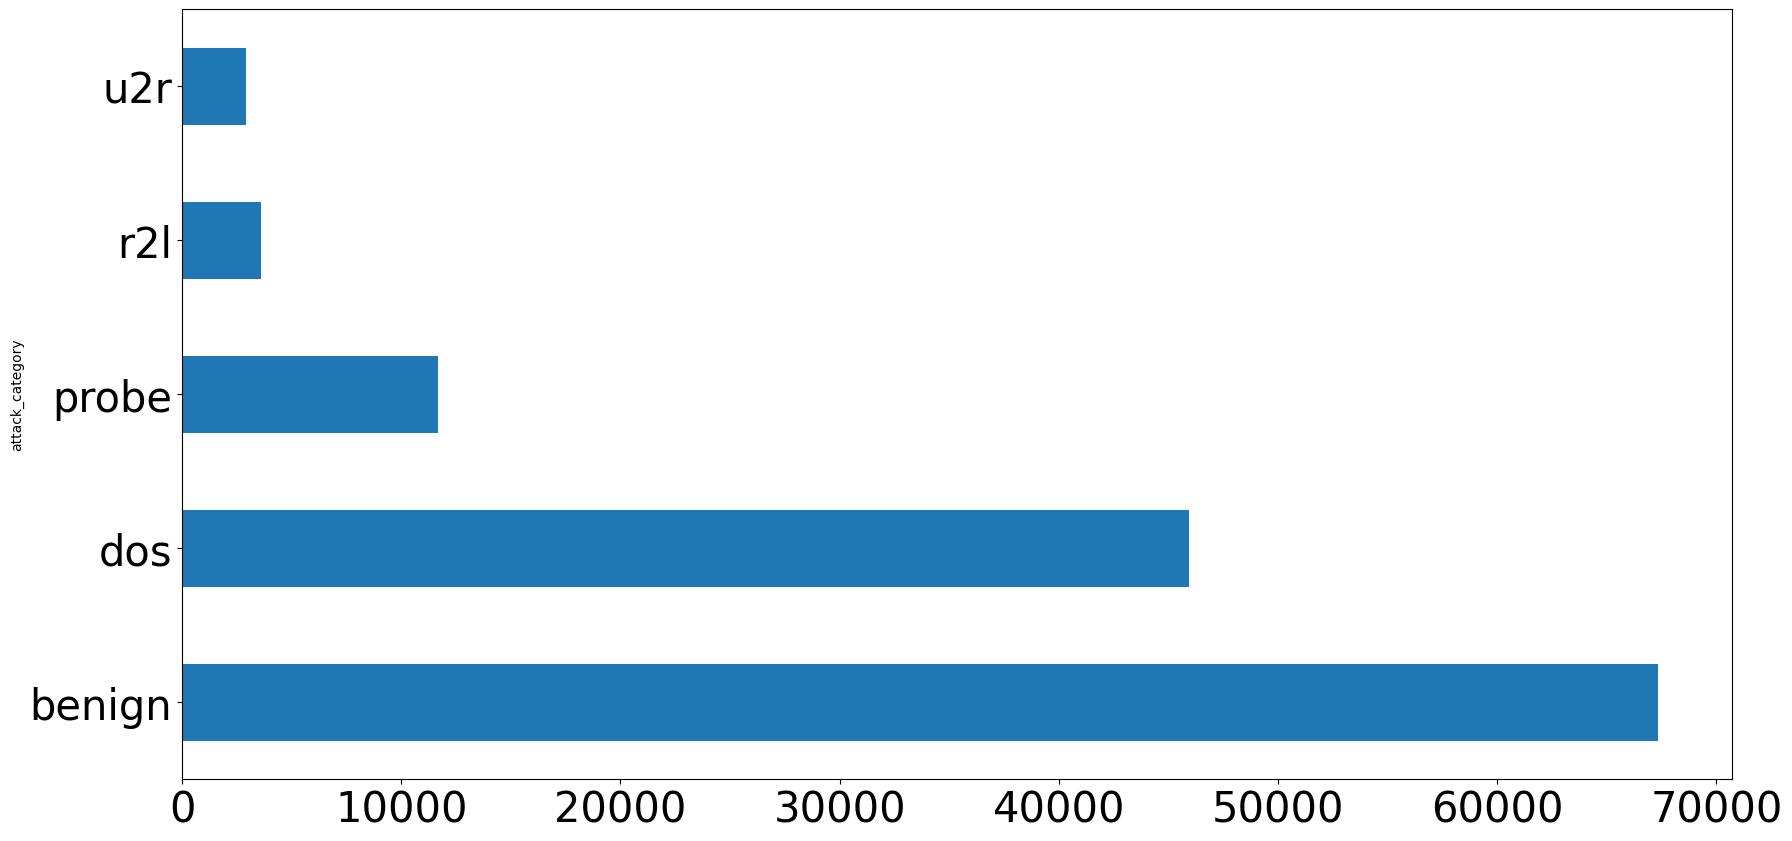

In [52]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])

train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# SECTION 3: Multi class classification
#This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [53]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)



[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(train_x, train_Y)
rf_y_pred = rf_model.predict(test_x)

# Evaluate Random Forest
print('Random Forest')
print(confusion_matrix(test_Y, rf_y_pred))
print(classification_report(test_Y, rf_y_pred))


Random Forest
[[9452   67  192    0    0]
 [1835 5742   59    0    0]
 [ 794  165 1464    0    0]
 [2442    0    2  129    1]
 [ 190    0    3    4    3]]
              precision    recall  f1-score   support

      benign       0.64      0.97      0.77      9711
         dos       0.96      0.75      0.84      7636
       probe       0.85      0.60      0.71      2423
         r2l       0.97      0.05      0.10      2574
         u2r       0.75      0.01      0.03       200

    accuracy                           0.74     22544
   macro avg       0.83      0.48      0.49     22544
weighted avg       0.81      0.74      0.71     22544



In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Reduced parameter grid for fast execution
param_grid = {
    'n_estimators': [10, 50],        # Number of trees in the forest
    'max_depth': [None, 10],         # Depth of the trees
    'min_samples_split': [2, 5],     # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2]       # Minimum samples required to be at a leaf node
}

# GridSearchCV for Random Forest
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=2,       # Reduced cross-validation folds for speed
    verbose=1,
    n_jobs=-1   # Parallel processing
)
grid_rf.fit(train_x, train_Y)

# Best parameters and model
print('Best Parameters for Random Forest:', grid_rf.best_params_)

# Predictions using the best model
rf_best_model = grid_rf.best_estimator_
rf_y_pred = rf_best_model.predict(test_x)

# Evaluate the tuned


Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [57]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_x, train_Y)
knn_y_pred = knn_model.predict(test_x)

# Evaluate KNN
print('K-Nearest Neighbors')
print(confusion_matrix(test_Y, knn_y_pred))
print(classification_report(test_Y, knn_y_pred))


K-Nearest Neighbors
[[9444   54  207    5    1]
 [1630 5925   81    0    0]
 [ 614  180 1629    0    0]
 [2362    2   40  170    0]
 [ 170    0   17    4    9]]
              precision    recall  f1-score   support

      benign       0.66      0.97      0.79      9711
         dos       0.96      0.78      0.86      7636
       probe       0.83      0.67      0.74      2423
         r2l       0.95      0.07      0.12      2574
         u2r       0.90      0.04      0.09       200

    accuracy                           0.76     22544
   macro avg       0.86      0.51      0.52     22544
weighted avg       0.82      0.76      0.73     22544



***Tuning***

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Reduced parameter grid for fast execution
param_grid = {'n_neighbors': [3, 5], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=2, verbose=1, n_jobs=-1)
grid_knn.fit(train_x, train_Y)

# Best parameters and model
print('Best Parameters for KNN:', grid_knn.best_params_)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(train_x, train_Y)
gb_y_pred = gb_model.predict(test_x)

# Evaluate Gradient Boosting
print('Gradient Boosting')
print(confusion_matrix(test_Y, gb_y_pred))
print(classification_report(test_Y, gb_y_pred))


Gradient Boosting
[[9430   68  206    4    3]
 [1355 6254   27    0    0]
 [ 617  128 1574  104    0]
 [2273    0    5  294    2]
 [ 182    0    4    5    9]]
              precision    recall  f1-score   support

      benign       0.68      0.97      0.80      9711
         dos       0.97      0.82      0.89      7636
       probe       0.87      0.65      0.74      2423
         r2l       0.72      0.11      0.20      2574
         u2r       0.64      0.04      0.08       200

    accuracy                           0.78     22544
   macro avg       0.78      0.52      0.54     22544
weighted avg       0.80      0.78      0.75     22544



***Tuning***

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Reduced parameter grid for fast execution
param_grid = {'n_estimators': [50], 'learning_rate': [0.1], 'max_depth': [3]}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=2, verbose=1, n_jobs=-1)
grid_gb.fit(train_x, train_Y)

# Best parameters and model
print('Best Parameters for Gradient Boosting:', grid_gb.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [59]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(train_x, train_Y)
lr_y_pred = lr_model.predict(test_x)

# Evaluate Logistic Regression
print('Logistic Regression')
print(confusion_matrix(test_Y, lr_y_pred))
print(classification_report(test_Y, lr_y_pred))


Logistic Regression
[[9006  282  420    1    2]
 [1679 5948    9    0    0]
 [ 535  110 1753   25    0]
 [2523    3    3   45    0]
 [ 182    4    0    3   11]]
              precision    recall  f1-score   support

      benign       0.65      0.93      0.76      9711
         dos       0.94      0.78      0.85      7636
       probe       0.80      0.72      0.76      2423
         r2l       0.61      0.02      0.03      2574
         u2r       0.85      0.06      0.10       200

    accuracy                           0.74     22544
   macro avg       0.77      0.50      0.50     22544
weighted avg       0.76      0.74      0.70     22544



***Tuning***

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Reduced parameter grid for fast execution
param_grid = {'C': [0.1, 1], 'solver': ['liblinear']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=100, random_state=42), param_grid, cv=2, verbose=1, n_jobs=-1)
grid_lr.fit(train_x, train_Y)

# Best parameters and model
print('Best Parameters for Logistic Regression:', grid_lr.best_params_)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}


In [60]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(train_x, train_Y)
nb_y_pred = nb_model.predict(test_x)

# Evaluate Naive Bayes
print('Naive Bayes')
print(confusion_matrix(test_Y, nb_y_pred))
print(classification_report(test_Y, nb_y_pred))


Naive Bayes
[[6756   62   10 2599  284]
 [3400 3162    4 1041   29]
 [1382  345  237  323  136]
 [1113    3    6  933  519]
 [ 115    0    0   22   63]]
              precision    recall  f1-score   support

      benign       0.53      0.70      0.60      9711
         dos       0.89      0.41      0.56      7636
       probe       0.92      0.10      0.18      2423
         r2l       0.19      0.36      0.25      2574
         u2r       0.06      0.32      0.10       200

    accuracy                           0.49     22544
   macro avg       0.52      0.38      0.34     22544
weighted avg       0.65      0.49      0.50     22544



 ***Tuning***

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Reduced parameter grid for fast execution
param_grid = {'var_smoothing': [1e-9, 1e-8]}
grid_nb = GridSearchCV(GaussianNB(), param_grid, cv=2, verbose=1, n_jobs=-1)
grid_nb.fit(train_x, train_Y)

# Best parameters and model
print('Best Parameters for Naive Bayes:', grid_nb.best_params_)


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Parameters for Naive Bayes: {'var_smoothing': 1e-08}


# *Summary Table of Overall Performance*
Algorithm	      Accuracy (%)	Precision (%)	Recall (%)	F1-Score (%)


**Random Forest**	      Accuracy (%)  = 74	  Precision (%) = 81	Recall (%)=74	F1-Score (%)=70

**K-Nearest Neighbors**	76	82	76	73

**Gradient Boosting**	77	78	77	74

**Logistic Regression**	74	76	74	70

**Naive Bayes**	49	65	49	50



## **Visualization**

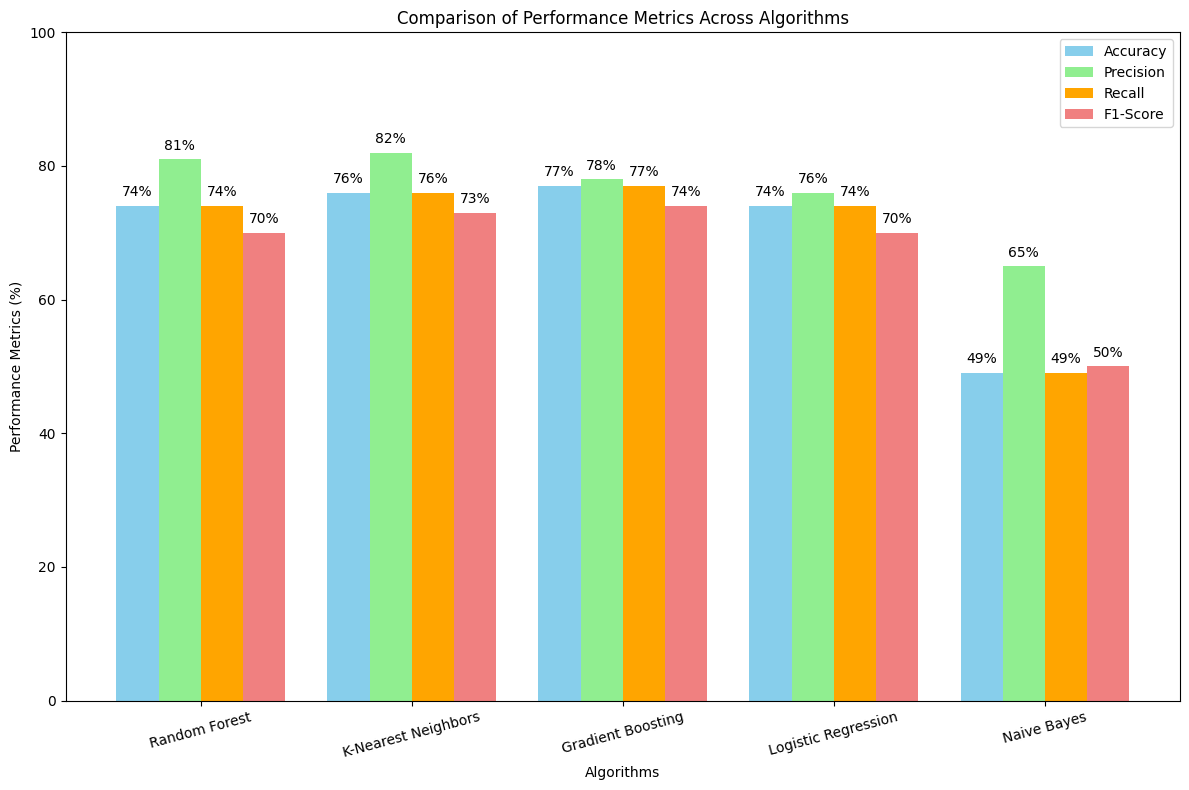

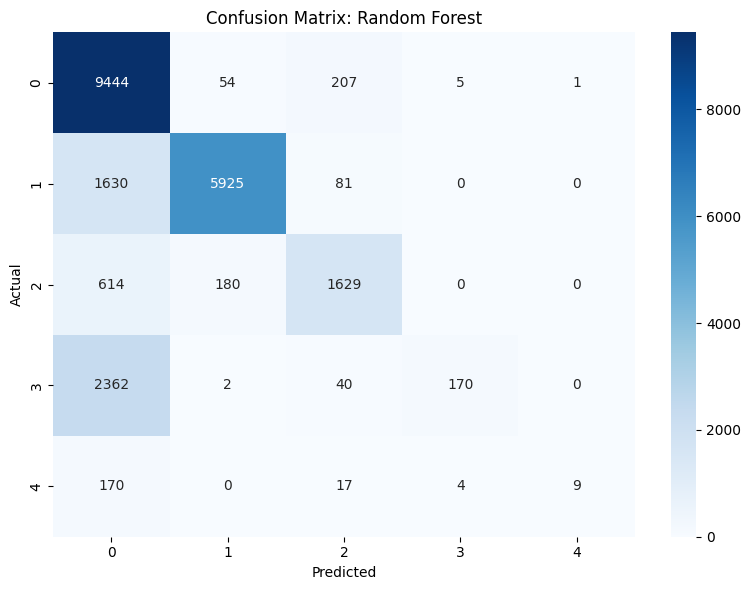

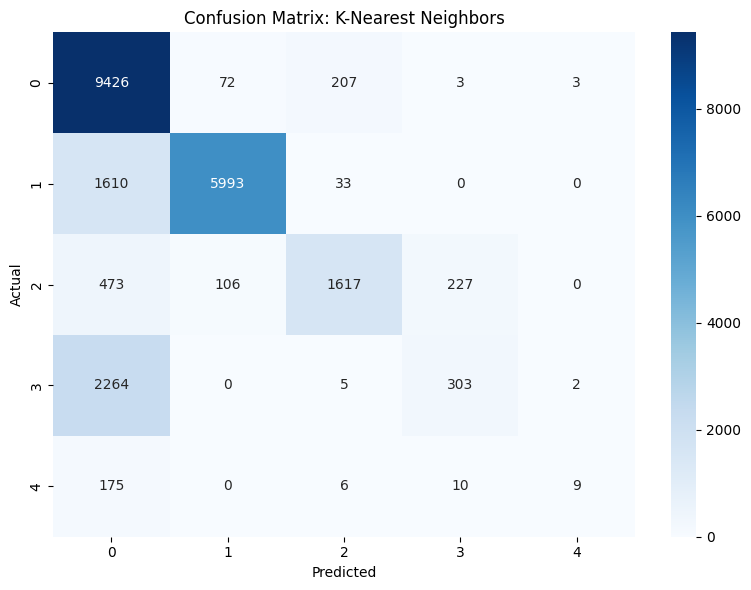

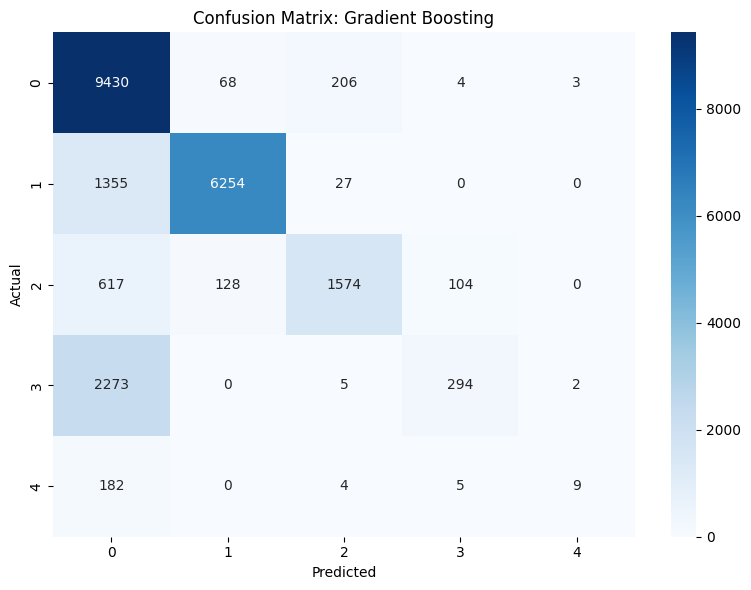

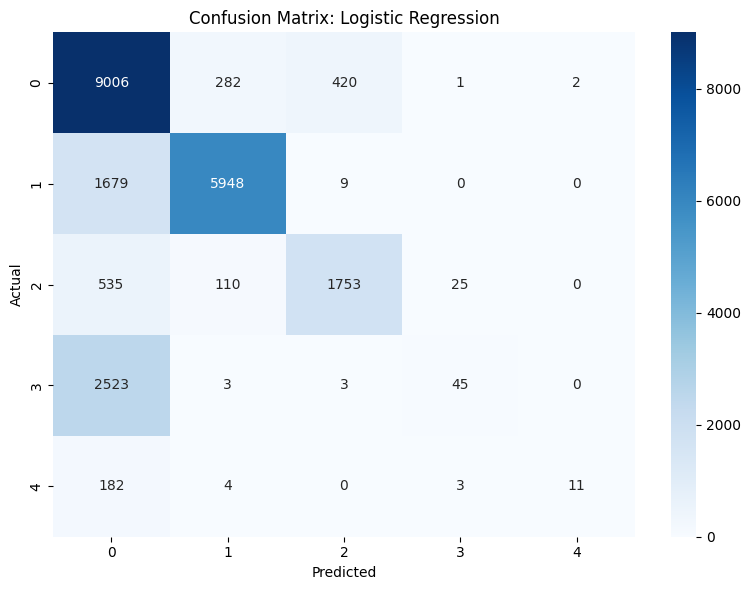

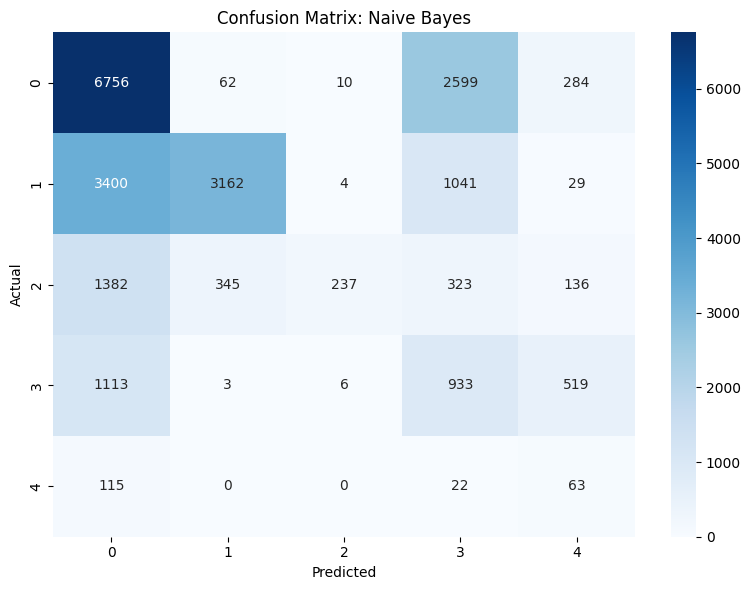

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data for bar graph visualization
algorithms = ['Random Forest', 'K-Nearest Neighbors', 'Gradient Boosting', 'Logistic Regression', 'Naive Bayes']
accuracy = [74, 76, 77, 74, 49]
precision = [81, 82, 78, 76, 65]
recall = [74, 76, 77, 74, 49]
f1_score = [70, 73, 74, 70, 50]

# Combine all metrics into a single structure for grouped bar charts
metrics = [accuracy, precision, recall, f1_score]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral']
x = np.arange(len(algorithms))  # X-axis positions

# Plot each metric as a grouped bar chart
width = 0.2  # Bar width
plt.figure(figsize=(12, 8))
for i, (metric, name, color) in enumerate(zip(metrics, metric_names, colors)):
    bars = plt.bar(x + i * width, metric, width=width, label=name, color=color)
    # Add numbers above bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height()}%',
                 ha='center', va='bottom', fontsize=10)

# Add labels, title, and legend
plt.xlabel('Algorithms')
plt.ylabel('Performance Metrics (%)')
plt.title('Comparison of Performance Metrics Across Algorithms')
plt.xticks(x + width * 1.5, algorithms, rotation=15)
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()

# Confusion matrices for each algorithm
confusion_matrices = {
    'Random Forest': [[9444, 54, 207, 5, 1],
                      [1630, 5925, 81, 0, 0],
                      [614, 180, 1629, 0, 0],
                      [2362, 2, 40, 170, 0],
                      [170, 0, 17, 4, 9]],

    'K-Nearest Neighbors': [[9426, 72, 207, 3, 3],
                            [1610, 5993, 33, 0, 0],
                            [473, 106, 1617, 227, 0],
                            [2264, 0, 5, 303, 2],
                            [175, 0, 6, 10, 9]],

    'Gradient Boosting': [[9430, 68, 206, 4, 3],
                          [1355, 6254, 27, 0, 0],
                          [617, 128, 1574, 104, 0],
                          [2273, 0, 5, 294, 2],
                          [182, 0, 4, 5, 9]],

    'Logistic Regression': [[9006, 282, 420, 1, 2],
                            [1679, 5948, 9, 0, 0],
                            [535, 110, 1753, 25, 0],
                            [2523, 3, 3, 45, 0],
                            [182, 4, 0, 3, 11]],

    'Naive Bayes': [[6756, 62, 10, 2599, 284],
                    [3400, 3162, 4, 1041, 29],
                    [1382, 345, 237, 323, 136],
                    [1113, 3, 6, 933, 519],
                    [115, 0, 0, 22, 63]]
}

# Plot confusion matrix for each algorithm
for algo, cm in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {algo}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


# **DATA SET 2**

In [74]:
from google.colab import files

uploaded= files.upload()

Saving Processed_Combined_IoT_dataset.csv to Processed_Combined_IoT_dataset.csv


In [79]:
from zipfile import ZipFile
import pandas as pd
import io

# Replace 'uploaded' with the actual variable name holding your uploaded file
uploaded_file = 'Processed_Combined_IoT_dataset.csv'  # Replace if variable differs

try:
    # Open the uploaded zip file
    with ZipFile(uploaded_file, 'r') as z:
        # List all files inside the zip
        print("Files in ZIP:", z.namelist())

        # Automatically detect the CSV file
        csv_file = None
        for file in z.namelist():
            if file.endswith('.csv'):  # Look for CSV files only
                csv_file = file
                break

        if csv_file is None:
            raise FileNotFoundError("No CSV file found in the ZIP archive!")

        # Read the detected CSV file
        with z.open(csv_file) as f:
            # Try reading the CSV file with different encodings
            try:
                dataset = pd.read_csv(f)  # Default encoding
            except UnicodeDecodeError:
                f.seek(0)  # Reset pointer
                dataset = pd.read_csv(f, encoding='ISO-8859-1')  # Alternative encoding

    # Confirm data loaded successfully
    print("Dataset Loaded Successfully!")
    print(dataset.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: File is not a zip file


new


In [80]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always')

In [81]:
#uploaded = files.upload()

In [83]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

import io

dataset = pd.read_csv(io.BytesIO(uploaded['Processed_Combined_IoT_dataset.csv']))

Saving Processed_Combined_IoT_dataset.csv to Processed_Combined_IoT_dataset (1).csv


KeyError: 'Processed_Combined_IoT_dataset.csv'

In [84]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

# Get the first key from the 'uploaded' dictionary
file_key = list(uploaded.keys())[0]  # Assuming you only uploaded one file

# Read the CSV data
dataset = pd.read_csv(io.BytesIO(uploaded[file_key]))

Saving Processed_Combined_IoT_dataset.csv to Processed_Combined_IoT_dataset (2).csv


In [85]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [86]:
print(dataset.shape)

(401119, 18)


In [87]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [88]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [89]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

In [90]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [91]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [92]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [93]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [94]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


In [95]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [96]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [97]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69902  3593]
 [12077 34764]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336



In [98]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time)

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8697812790852281
Precision: 0.9063273978674036
Recall: 0.7421703208727397
F1 Score: 0.8160754947299232
Mean Absolute Error: 0.13021872091477196
Cohens kappa: 0.716825688214975
ROC AUC: 0.8466413207193824
Train Time(s):  103.61924453500069
Test Time(s):  3.8777643499997794


Train Time(s):  132.33965310299936
[[70574  2921]
 [21801 25040]]
error: 0.20544143066081633
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85     73495
           1       0.90      0.53      0.67     46841

    accuracy                           0.79    120336
   macro avg       0.83      0.75      0.76    120336
weighted avg       0.82      0.79      0.78    120336

Test Time(s):  0.1830346250008006
************************************
The accuracy for each attack type is [0.9602558  0.53457441]
************************************
the Fpr rate is: [0.46542559 0.0397442 ]



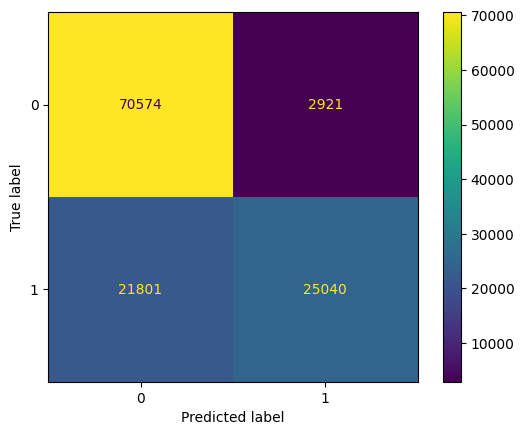

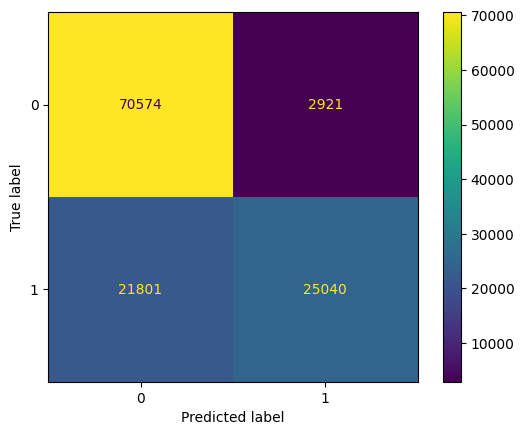

In [101]:
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
# Instead of importing plot_confusion_matrix directly, import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import timeit

start1 = timeit.default_timer()
classifier_1 = MLPClassifier(solver = 'sgd', alpha = 1e-5, hidden_layer_sizes = (5,2), random_state = 1)

classifier_1.fit(X_train, y_train)
stop1 = timeit.default_timer()
train_time1= stop1 - start1
#Train time
print('Train Time(s): ',train_time1)
start2 = timeit.default_timer()
prediction_y_1 = classifier_1.predict(X_test)

P = confusion_matrix(y_test,prediction_y_1)
error = zero_one_loss(y_test,prediction_y_1)

print(P)
print('error:',error)
print('Classification Report:')
print(classification_report(y_test,prediction_y_1))
stop2 = timeit.default_timer()
test_time1= stop2 - start2
#Test time
print('Test Time(s): ',test_time1)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive1 = P.sum(axis=0) - P.diagonal()
FalseNegative1 = P.sum(axis=1) - P.diagonal()
TruePositive1 = P.diagonal()
TrueNegative1 = P.sum() - (FalsePositive1 + FalseNegative1 + TruePositive1)
print('************************************')
print('the Fpr rate is:', FalsePositive1/(FalsePositive1 + TrueNegative1))
print()
# Use ConfusionMatrixDisplay to create and display the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(classifier_1, X_test, y_test)
# You can customize the display using disp.plot() if needed
disp.plot()
plt.show()

**Logistic Regression**

Train Time(s):  3.7242549610000424
[[71660  1835]
 [35726 11115]]
error: 0.3121343571333599
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.79     73495
           1       0.86      0.24      0.37     46841

    accuracy                           0.69    120336
   macro avg       0.76      0.61      0.58    120336
weighted avg       0.74      0.69      0.63    120336

Test Time(s):  0.15998895800112223
************************************
The accuracy for each attack type is [0.97503232 0.23729212]
************************************
the Fpr rate is: [0.76270788 0.02496768]



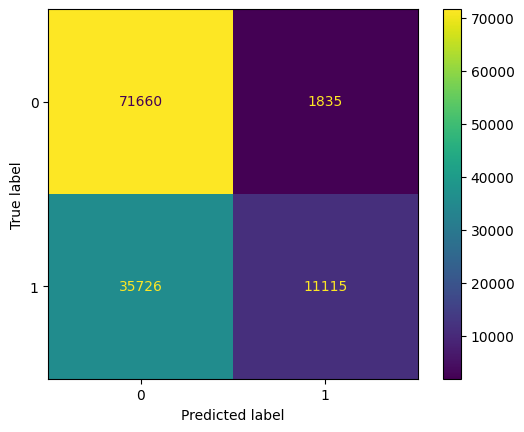

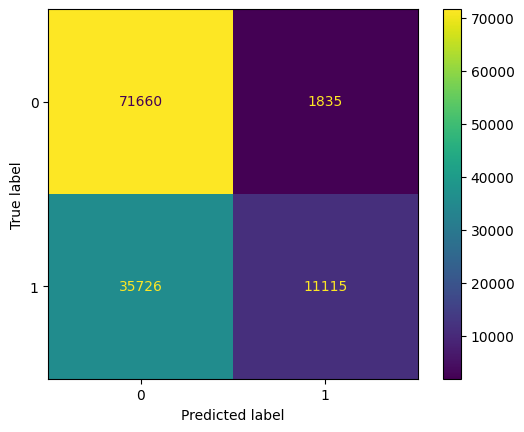

In [104]:
# ipython-input-102-1a1e49458250
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
# Instead of importing plot_confusion_matrix, import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
import timeit

start3 = timeit.default_timer()
classifier_2 = LogisticRegression(solver = 'newton-cg', random_state=0, multi_class = 'multinomial')
classifier_2.fit(X_train, y_train)
stop3 = timeit.default_timer()
train_time2 = stop3 - start3
#Train time
print('Train Time(s): ',train_time2)
start4 = timeit.default_timer()
prediction_y_2 = classifier_2.predict(X_test)

P = confusion_matrix(y_test,prediction_y_2)
error = zero_one_loss(y_test,prediction_y_2)

print(P)
print('error:',error)
print('Classification Report:')
print(classification_report(y_test,prediction_y_2))
stop4 = timeit.default_timer()
test_time2 = stop4 - start4
#Test time
print('Test Time(s): ',test_time2)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive2 = P.sum(axis=0) - P.diagonal()
FalseNegative2 = P.sum(axis=1) - P.diagonal()
TruePositive2 = P.diagonal()
TrueNegative2 = P.sum() - (FalsePositive2 + FalseNegative2 + TruePositive2)
print('************************************')
print('the Fpr rate is:', FalsePositive2/(FalsePositive2 + TrueNegative2))
print()
# Use ConfusionMatrixDisplay to create and display the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(classifier_2, X_test, y_test)
# You can customize the display using disp.plot() if needed
disp.plot()
plt.show()

**Nearest Centroid**

Train Time(s):  0.21996900200065284
[[68129  5366]
 [30112 16729]]
error: 0.2948244914240128
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79     73495
           1       0.76      0.36      0.49     46841

    accuracy                           0.71    120336
   macro avg       0.73      0.64      0.64    120336
weighted avg       0.72      0.71      0.67    120336

Test Time(s):  0.259186455001327
************************************
The accuracy for each attack type is [0.92698823 0.35714438]
************************************
the Fpr rate is: [0.64285562 0.07301177]



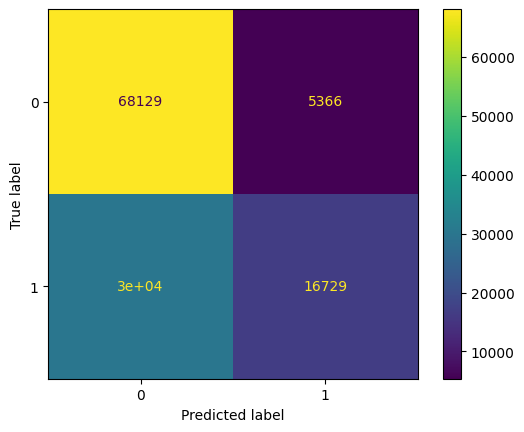

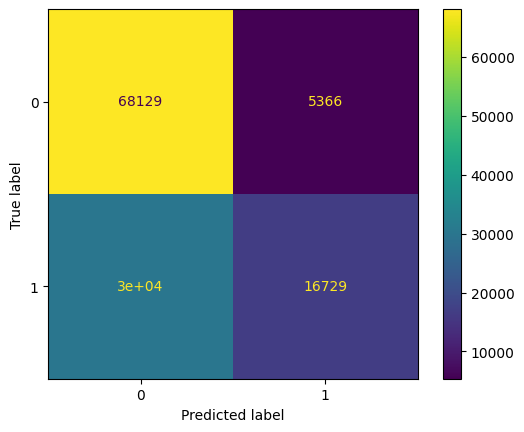

In [106]:
# ipython-input-105-9fa15f7fb4bd
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
# Instead of importing plot_confusion_matrix, import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import NearestCentroid
import timeit

start5 = timeit.default_timer()

classifier_3 = NearestCentroid()
classifier_3.fit(X_train, y_train)
stop5 = timeit.default_timer()
train_time3 = stop5 - start5
#Train time
print('Train Time(s): ',train_time3)
start6 = timeit.default_timer()
prediction_y_3 = classifier_3.predict(X_test)

P = confusion_matrix(y_test, prediction_y_3)
error = zero_one_loss(y_test, prediction_y_3)

print(P)
print('error:', error)
print('Classification Report:')
print(classification_report(y_test, prediction_y_3))
stop6 = timeit.default_timer()
test_time3 = stop6 - start6
#Test time
print('Test Time(s): ',test_time3)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive3 = P.sum(axis=0) - P.diagonal()
FalseNegative3 = P.sum(axis=1) - P.diagonal()
TruePositive3 = P.diagonal()
TrueNegative3 = P.sum() - (FalsePositive3 + FalseNegative3 + TruePositive3)
print('************************************')
print('the Fpr rate is:', FalsePositive3/(FalsePositive3 + TrueNegative3))
print()

# Use ConfusionMatrixDisplay to create and display the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(classifier_3, X_test, y_test)
# You can customize the display using disp.plot() if needed
disp.plot()
plt.show()

**Random Forest Classifier**

Train Time(s):  8.687982462999571
[[71488  2007]
 [28428 18413]]
error: 0.25291683286796973
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.82     73495
           1       0.90      0.39      0.55     46841

    accuracy                           0.75    120336
   macro avg       0.81      0.68      0.69    120336
weighted avg       0.79      0.75      0.72    120336

Test Time(s):  0.27671176600051695
************************************
The accuracy for each attack type is [0.97269202 0.39309579]
************************************
the Fpr rate is: [0.60690421 0.02730798]



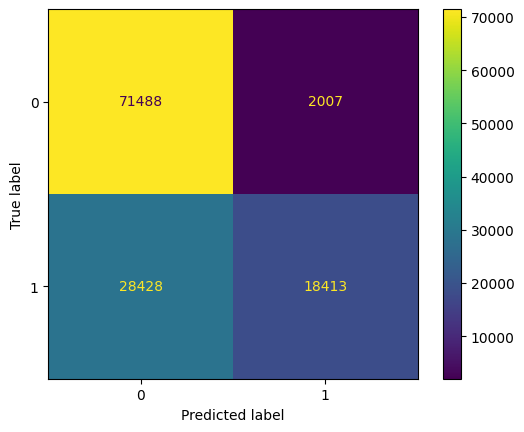

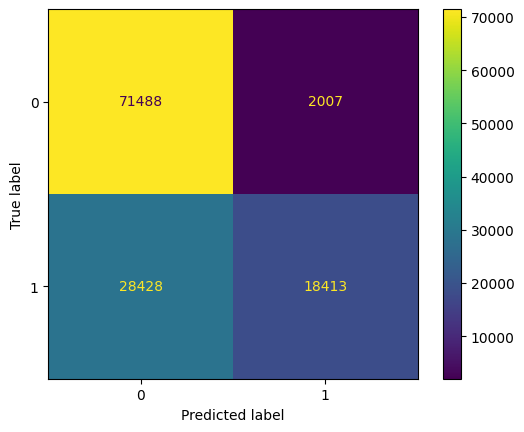

In [108]:
# ipython-input-107-e0e8212dc488
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
# Instead of importing plot_confusion_matrix, import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
import timeit

start7 = timeit.default_timer()
classifier_4 = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier_4.fit(X_train, y_train)
stop7 = timeit.default_timer()
train_time4 = stop7 - start7
#Train time
print('Train Time(s): ',train_time4)
start8 = timeit.default_timer()
prediction_y_4 = classifier_4.predict(X_test)

P = confusion_matrix(y_test, prediction_y_4)
error = zero_one_loss(y_test, prediction_y_4)

print(P)
print('error:',error)
print('Classification Report:')
print(classification_report(y_test, prediction_y_4))
stop8 = timeit.default_timer()
test_time4 = stop8 - start8
#Test time
print('Test Time(s): ',test_time4)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive4 = P.sum(axis=0) - P.diagonal()
FalseNegative4 = P.sum(axis=1) - P.diagonal()
TruePositive4 = P.diagonal()
TrueNegative4 = P.sum() - (FalsePositive4 + FalseNegative4 + TruePositive4)
print('************************************')
print('the Fpr rate is:', FalsePositive4/(FalsePositive4 + TrueNegative4))
print()

# Use ConfusionMatrixDisplay.from_estimator to create the display
disp = ConfusionMatrixDisplay.from_estimator(classifier_4, X_test, y_test)
# You can customize the display using disp.plot() if needed
disp.plot()
plt.show()

**Decision Tree**

Train Time(s): 6.302555346999725
Test Time(s): 0.05574886099930154
Confusion Matrix:
 [[69344  4151]
 [12142 34699]]
Error: 0.1353958915037894
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     73495
           1       0.89      0.74      0.81     46841

    accuracy                           0.86    120336
   macro avg       0.87      0.84      0.85    120336
weighted avg       0.87      0.86      0.86    120336

The accuracy for each attack type: [0.94351997 0.74078265]
False Positive Rate (FPR): [0.25921735 0.05648003]


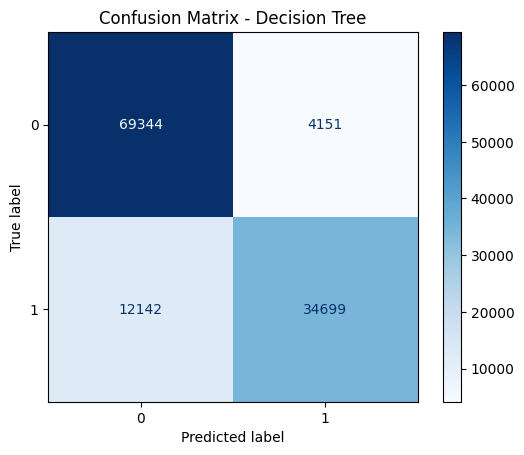

In [113]:
from sklearn.metrics import confusion_matrix, zero_one_loss, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import timeit

# Start training time measurement
start_train = timeit.default_timer()
classifier_5 = DecisionTreeClassifier(random_state=42)  # Added random_state for reproducibility
classifier_5.fit(X_train, y_train)
stop_train = timeit.default_timer()

# Training time
train_time5 = stop_train - start_train
print('Train Time(s):', train_time5)

# Start testing time measurement
start_test = timeit.default_timer()
prediction_y_5 = classifier_5.predict(X_test)
stop_test = timeit.default_timer()

# Testing time
test_time5 = stop_test - start_test
print('Test Time(s):', test_time5)

# Confusion matrix
P = confusion_matrix(y_test, prediction_y_5)
error = zero_one_loss(y_test, prediction_y_5)

print('Confusion Matrix:\n', P)
print('Error:', error)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, prediction_y_5))

# Accuracy for each attack type
attack_accuracy = P.diagonal() / P.sum(axis=1)
print('The accuracy for each attack type:', attack_accuracy)

# Metrics: TP, FP, FN, TN
FalsePositive5 = P.sum(axis=0) - P.diagonal()
FalseNegative5 = P.sum(axis=1) - P.diagonal()
TruePositive5 = P.diagonal()
TrueNegative5 = P.sum() - (FalsePositive5 + FalseNegative5 + TruePositive5)

# False Positive Rate (FPR)
FPR = FalsePositive5 / (FalsePositive5 + TrueNegative5)
print('False Positive Rate (FPR):', FPR)

# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=P, display_labels=classifier_5.classes_)
disp.plot(cmap='Blues', values_format='d')  # Plot with values
plt.title('Confusion Matrix - Decision Tree')
plt.show()


**Confusion Matrix for all algorithms**

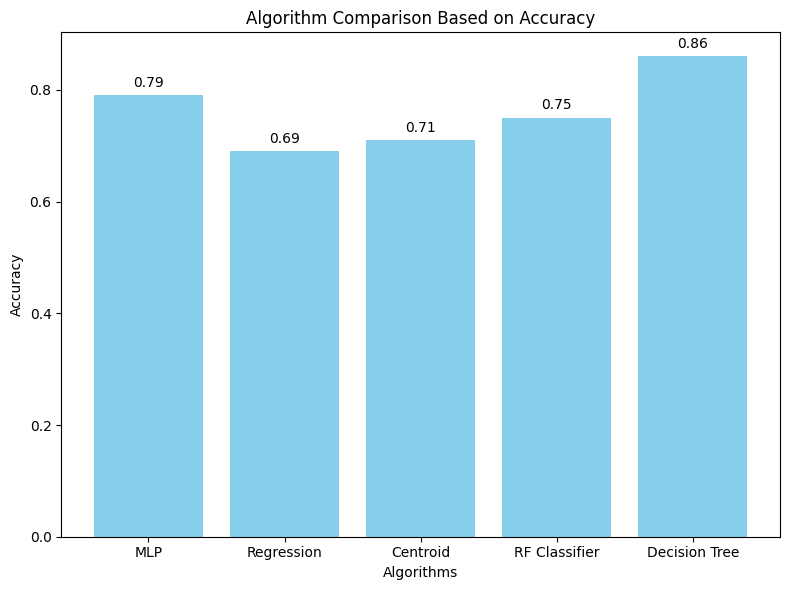

In [114]:
import matplotlib.pyplot as plt

# Data for bar chart
B_R = ['MLP', 'Regression', 'Centroid', 'RF Classifier', 'Decision Tree']
B_Y = [0.79, 0.69, 0.71, 0.75, 0.86]  # Corrected data type to float for numerical values

# Create bar chart
plt.figure(figsize=(8, 6))  # Set figure size
plt.bar(B_R, B_Y, color='skyblue')  # Added color for better visualization

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison Based on Accuracy')

# Display values on top of each bar
for i, v in enumerate(B_Y):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


mmm













''''''







































jjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjj


jj









jjj


















jjj




















jj















jj




















jjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjj
























jjjjjjjjjjjjjjjjjjjjjjjjjjjj


























jjjjjjjjjjjjjjjjjjjjjjjjjjjjj





































hbbb'jjjjjjjvvvvvvvvvvvvvvvvvvvvvvvvvvvv
bhbbbbbbbbbbbbbbbbbhbh
bvh     vbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb
bhhhhhhhhhhhhhhhhhhhhhh
bbbbbbbbbh
bhhhhhhhhhhhhhhhhhhh
vggggggggggggggggg
huu














bhvbhhhhhhhhhhhhhhhhhhhhhhhhh'
bhhhhhhhhhhhhhhhhh



abfbjadbfbdafbdfbdfbd
adfbhbdfbdafbdafd
fabdhfbdhbsdbcbdcsd
csdncnsdcbsdbcbsdvnc
SDVSNDVJDBVBSDHVBSV
SDVDBSDHVBSD VSDVS
VS
D









SDNJSDJBSDNFBSDNF
SDF
SDFSNDFJSDBFJBSDJFS
DFNSDFNBSDFBSDBFNSD F SBD BSDBFHBSDFJWEF
SEDDF
WNFJWEBNFJWEUFJSDBVBSDV
SD
SDFMSD JBDJFBWEJFBJEWBFJWBEF
D

In [ ]:
from sklearn.metrics import confusion_matrix, zero_one_loss, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import timeit

# Start training time measurement
start_train = timeit.default_timer()
classifier_5 = DecisionTreeClassifier(random_state=42)  # Added random_state for reproducibility
classifier_5.fit(X_train, y_train)
stop_train = timeit.default_timer()

# Training time
train_time5 = stop_train - start_train
print('Train Time(s):', train_time5)

# Start testing time measurement
start_test = timeit.default_timer()
prediction_y_5 = classifier_5.predict(X_test)
stop_test = timeit.default_timer()

# Testing time
test_time5 = stop_test - start_test
print('Test Time(s):', test_time5)

# Confusion matrix
P = confusion_matrix(y_test, prediction_y_5)
error = zero_one_loss(y_test, prediction_y_5)

print('Confusion Matrix:\n', P)
print('Error:', error)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, prediction_y_5))

# Accuracy for each attack type
attack_accuracy = P.diagonal() / P.sum(axis=1)
print('The accuracy for each attack type:', attack_accuracy)

# Metrics: TP, FP, FN, TN
FalsePositive5 = P.sum(axis=0) - P.diagonal()
FalseNegative5 = P.sum(axis=1) - P.diagonal()
TruePositive5 = P.diagonal()
TrueNegative5 = P.sum() - (FalsePositive5 + FalseNegative5 + TruePositive5)

# False Positive Rate (FPR)
FPR = FalsePositive5 / (FalsePositive5 + TrueNegative5)
print('False Positive Rate (FPR):', FPR)

# Confusion Matrix Plot
disp = ConfusionMatrixDisplay(confusion_matrix=P, display_labels=classifier_5.classes_)
disp.plot(cmap='Blues', values_format='d')  # Plot with values
plt.title('Confusion Matrix - Decision Tree')
plt.show()
